In [1]:
from zipfile import ZipFile
import os

# Replace 'your_extraction_folder' with the folder where you want to extract the contents
extraction_folder = '/content/newfyp'

# Replace 'your_zip_file.zip' with the actual filename
zip_file_path = '/content/newfyp.zip'

# Unzip the file
try:
    with ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_folder)
    print(f"Files successfully extracted to {extraction_folder}")
except Exception as e:
    print(f"An error occurred: {e}")

# List files in the extraction folder
try:
    files_in_extraction_folder = os.listdir(extraction_folder)
    print(f"Files in the extraction folder: {files_in_extraction_folder}")
except FileNotFoundError:
    print(f"Extraction folder not found: {extraction_folder}")
except Exception as e:
    print(f"An error occurred while listing files: {e}")


Files successfully extracted to /content/newfyp
Files in the extraction folder: ['newfyp']


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define paths to the datasets
train_dir = '/content/newfyp/newfyp/newfyp/fyp/Training (70%)'
validation_dir = '/content/newfyp/newfyp/newfyp/fyp/Validation (10%)'
test_dir = '/content/newfyp/newfyp/newfyp/fyp/Testing (20%)'

# Set parameters
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)
batch_size = 16
epochs = 128

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='categorical',
                                                    shuffle=True)

validation_generator = validation_test_datagen.flow_from_directory(validation_dir, target_size=(img_width, img_height),
                                                                  batch_size=batch_size, class_mode='categorical')

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))  # Assuming 4 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, steps_per_epoch=max(1, train_generator.samples // batch_size),
                    epochs=epochs, validation_data=validation_generator,
                    validation_steps=max(1, validation_generator.samples // batch_size))

# Save the class indices to use for later predictions
class_indices = train_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}

# Evaluate on the test set
test_generator = validation_test_datagen.flow_from_directory(test_dir, target_size=(img_width, img_height),
                                                             batch_size=batch_size, class_mode='categorical', shuffle=False)

# Make sure we predict on all images
steps = test_generator.samples // batch_size + (test_generator.samples % batch_size > 0)
predictions = model.predict(test_generator, steps=steps)
# Convert predictions to class names
predicted_classes_indices = np.argmax(predictions, axis=1)
predicted_classes_names = [index_to_class[idx] for idx in predicted_classes_indices]

# Output the predictions for each test image
for i in range(len(predicted_classes_names)):
    # Get the file path for the current index
    file_path = test_generator.filepaths[i % len(test_generator.filepaths)]
    print(f"Image: {file_path.split('/')[-1]} - Class: {predicted_classes_names[i]}")

# Print the test accuracy
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {test_accuracy}")

Found 426 images belonging to 4 classes.
Found 63 images belonging to 4 classes.
Epoch 1/128
26/26 [==============================] - 12s 423ms/step - loss: 3.0992 - accuracy: 0.3707 - val_loss: 1.0364 - val_accuracy: 0.5625
Epoch 2/128
26/26 [==============================] - 10s 389ms/step - loss: 0.7913 - accuracy: 0.7317 - val_loss: 0.5544 - val_accuracy: 0.7708
Epoch 3/128
26/26 [==============================] - 9s 338ms/step - loss: 0.4773 - accuracy: 0.8512 - val_loss: 0.5275 - val_accuracy: 0.7917
Epoch 4/128
26/26 [==============================] - 10s 392ms/step - loss: 0.4188 - accuracy: 0.8463 - val_loss: 0.4107 - val_accuracy: 0.8542
Epoch 5/128
26/26 [==============================] - 10s 395ms/step - loss: 0.2421 - accuracy: 0.9390 - val_loss: 0.2343 - val_accuracy: 0.8750
Epoch 6/128
26/26 [==============================] - 10s 381ms/step - loss: 0.2125 - accuracy: 0.9220 - val_loss: 0.3110 - val_accuracy: 0.9375
Epoch 7/128
26/26 [==============================] - 9s 

In [5]:
for i, prediction in enumerate(predictions):
    print(f"Image {i}:")
    for class_index, prob in enumerate(prediction):
        class_name = index_to_class[class_index]  # Get the class name using the index_to_class dictionary
        print(f"    {class_name}: {prob*100:.2f}%")
    print("\n")

Image 0:
    Glass: 99.31%
    Metal: 0.67%
    Miscellaneous: 0.02%
    Plastic: 0.00%


Image 1:
    Glass: 100.00%
    Metal: 0.00%
    Miscellaneous: 0.00%
    Plastic: 0.00%


Image 2:
    Glass: 100.00%
    Metal: 0.00%
    Miscellaneous: 0.00%
    Plastic: 0.00%


Image 3:
    Glass: 100.00%
    Metal: 0.00%
    Miscellaneous: 0.00%
    Plastic: 0.00%


Image 4:
    Glass: 99.98%
    Metal: 0.00%
    Miscellaneous: 0.02%
    Plastic: 0.00%


Image 5:
    Glass: 100.00%
    Metal: 0.00%
    Miscellaneous: 0.00%
    Plastic: 0.00%


Image 6:
    Glass: 99.51%
    Metal: 0.31%
    Miscellaneous: 0.11%
    Plastic: 0.07%


Image 7:
    Glass: 99.98%
    Metal: 0.00%
    Miscellaneous: 0.01%
    Plastic: 0.00%


Image 8:
    Glass: 99.94%
    Metal: 0.06%
    Miscellaneous: 0.00%
    Plastic: 0.00%


Image 9:
    Glass: 99.55%
    Metal: 0.31%
    Miscellaneous: 0.14%
    Plastic: 0.00%


Image 10:
    Glass: 92.71%
    Metal: 0.22%
    Miscellaneous: 7.04%
    Plastic: 0.02%


Image

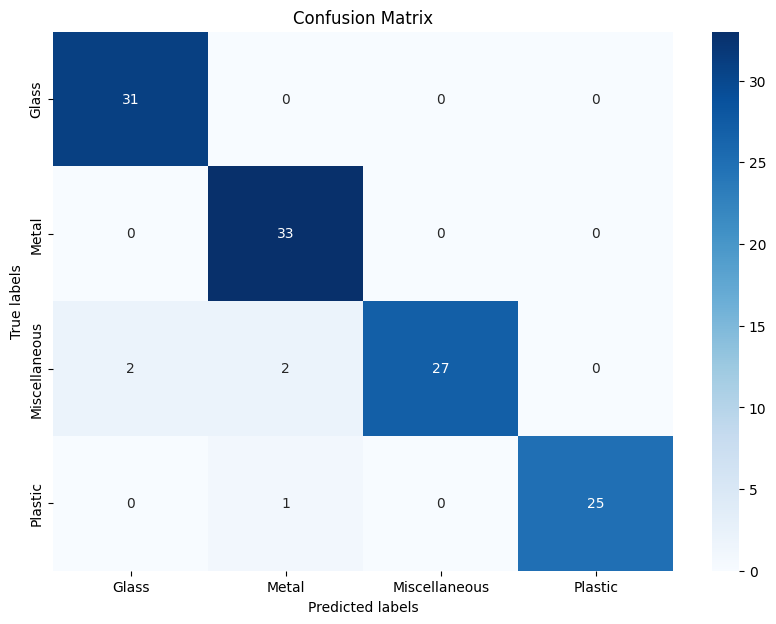

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the true class indices
true_classes = test_generator.classes

# Predicted class indices were obtained previously as `predicted_classes_indices`

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes_indices)

# Convert class indices to class names for the confusion matrix
class_names = [index_to_class[i] for i in range(len(index_to_class))]

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [9]:
# Save the model to a file
model.save('my_cnn_model_updated(latest).h5')  # Saves the model in HDF5 format


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
from google.colab import files
files.download('my_cnn_model_updated(latest).h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>